In [ ]:
import csv
import sklearn
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Check for number of null values

In [ ]:
train.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Remove columns that are not factors to survival. In this case, PassengerId,
Ticket.

In [ ]:
train = train.drop(["PassengerId", "Ticket"], axis=1)

Remove null values in Age, Embarked

In [ ]:
train = train.dropna(subset=["Age"])
train = train.dropna(subset=["Embarked"])

Modify cabin into a new row deck by:
1. Replacing all null values with U0
2. Extract alphabet from cabin into deck
3. Drop cabin

In [ ]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    # Convert null values into U0
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    # Extract alphabet from cabin
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    # Map alphabets of Deck into numeric digits
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

train = train.drop(["Cabin"], axis = 1)

SibSp (# of siblings / spouses aboard the Titanic), Parch (# of parents / children aboard the Titanic) both indicate number of relatives. Hence, they can be combined  into a new variable, Relatives for both test and train sets.

In [ ]:
data = [train, test]

for dataset in data:
  dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']

# Drop both after creation of Relatives
train = train.drop(["SibSp", "Parch"], axis = 1)

Tokenise Sex, Embarked into int





In [ ]:
sex = {"male": 0, "female": 1}
embark = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
  dataset["Sex"] = dataset["Sex"].map(sex)
  dataset["Embarked"] = dataset["Embarked"].map(embark)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   712 non-null    int64  
 1   Pclass     712 non-null    int64  
 2   Name       712 non-null    object 
 3   Sex        712 non-null    int64  
 4   Age        712 non-null    float64
 5   Fare       712 non-null    float64
 6   Embarked   712 non-null    int64  
 7   Deck       712 non-null    int64  
 8   Relatives  712 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 55.6+ KB


Start EDA: Bi-variate analysis with Survived as the target variable.

In [ ]:
pclass = pd.DataFrame(train["Pclass"])
sex = pd.DataFrame(train["Sex"])
age = pd.DataFrame(train["Age"])
fare = pd.DataFrame(train["Fare"])
embarked = pd.DataFrame(train["Embarked"])
deck = pd.DataFrame(train["Deck"])
relatives = pd.DataFrame(train["Relatives"])

**Visualise numerical variables**

In [ ]:
# Describe for numerical variables
numeric_train = train[["Age", "Fare", "Relatives", "Survived"]]
numeric_train.describe().round(2)

,Age,Fare,Relatives,Survived
count,712.00,712.00,712.00,712.00
mean,29.64,34.57,0.95,0.40
std,14.49,52.94,1.49,0.49
min,0.42,0.00,0.00,0.00
25%,20.00,8.05,0.00,0.00
50%,28.00,15.65,0.00,0.00
75%,38.00,33.00,1.00,1.00
max,80.00,512.33,7.00,1.00


<Axes: >

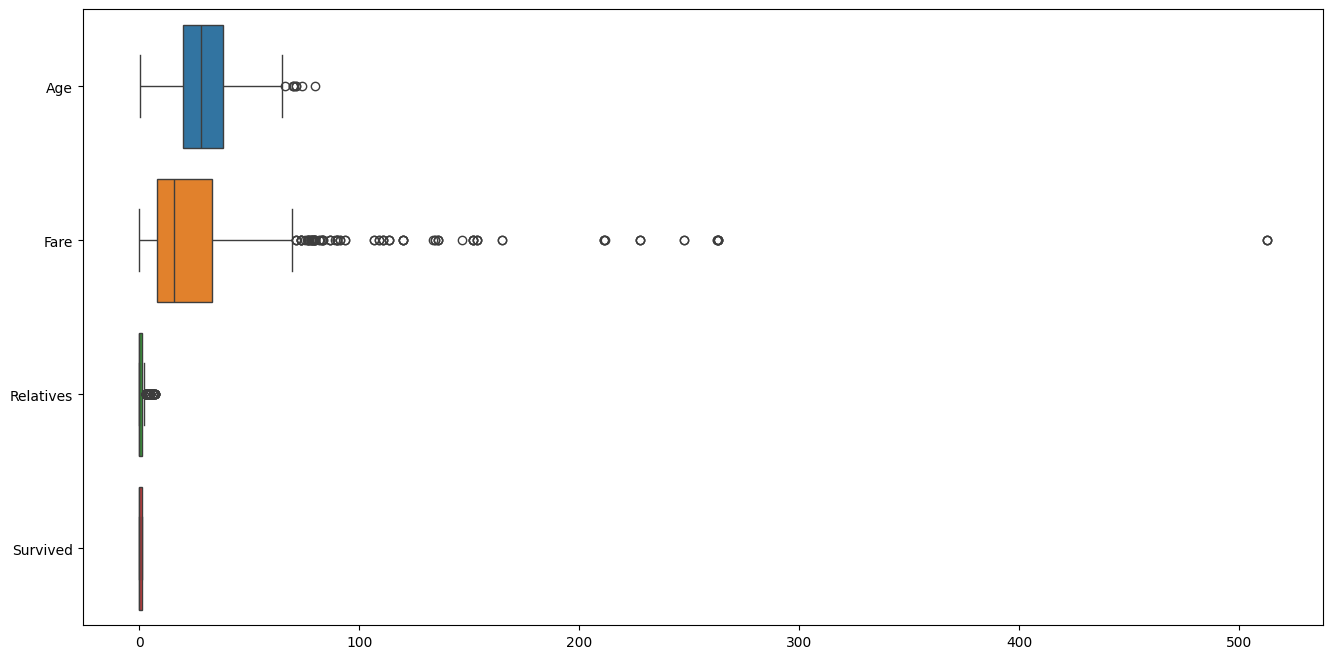

In [ ]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = numeric_train, orient = "h")

<Axes: xlabel='Age', ylabel='Survived'>

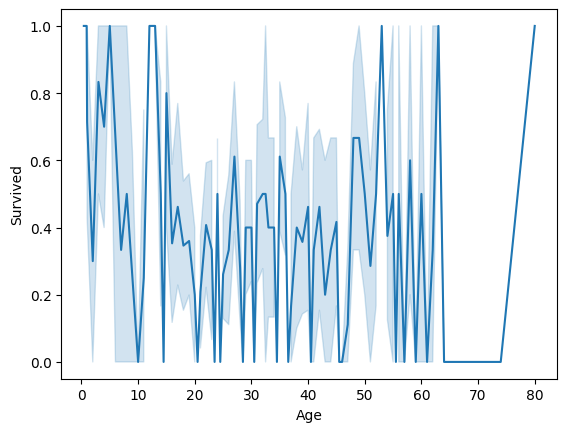

In [ ]:
# Plot the line plot
sb.lineplot(x="Age", y="Survived", data=numeric_train)

<Axes: xlabel='Fare', ylabel='Survived'>

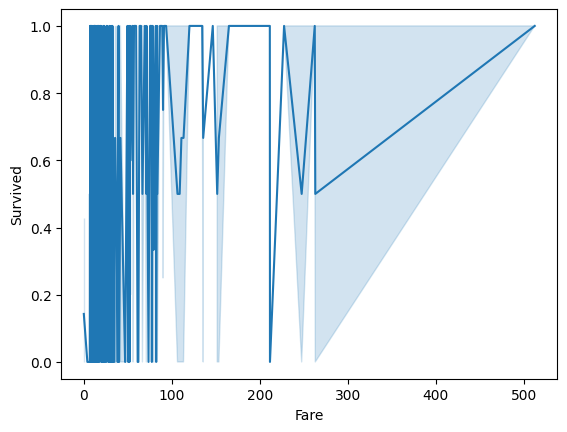

In [ ]:
sb.lineplot(x="Fare", y="Survived", data=numeric_train)

<Axes: xlabel='Relatives', ylabel='Survived'>

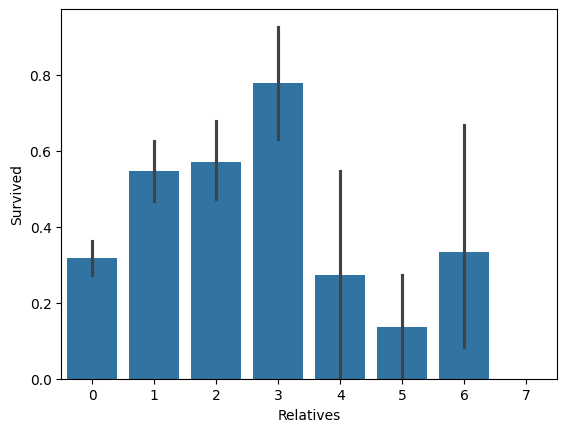

In [ ]:
sb.barplot(x="Relatives", y="Survived", data=numeric_train)

**Visualise categorical variables**

In [ ]:
cat_train = train[["Pclass", "Sex", "Embarked", "Deck", "Survived"]]

Pclass: 1 = 1st, 2 = 2nd, 3 = 3rd

<Axes: xlabel='Pclass', ylabel='Survived'>

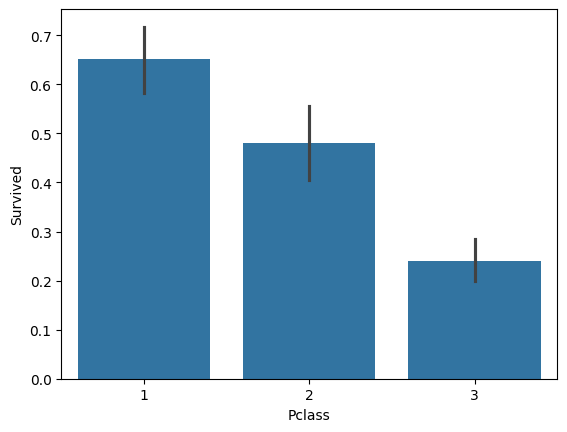

In [ ]:
sb.barplot(x="Pclass", y="Survived", data=cat_train)

Sex: 0 = Male, 1 = Female

<Axes: xlabel='Sex', ylabel='Survived'>

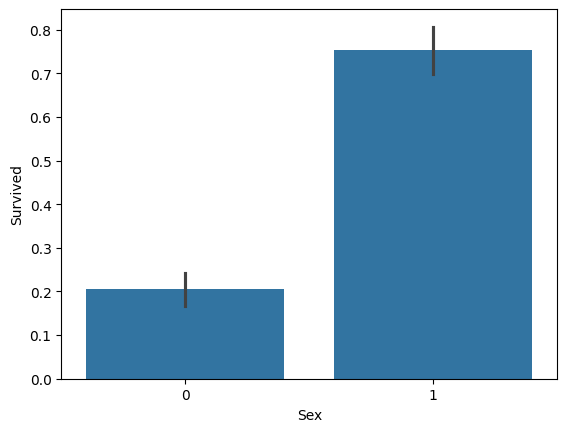

In [ ]:
sb.barplot(x="Sex", y="Survived", data=cat_train)

Embarked: 0 = Southampton, 1 = Cherbourg, 2 = Queenstown

<Axes: xlabel='Embarked', ylabel='Survived'>

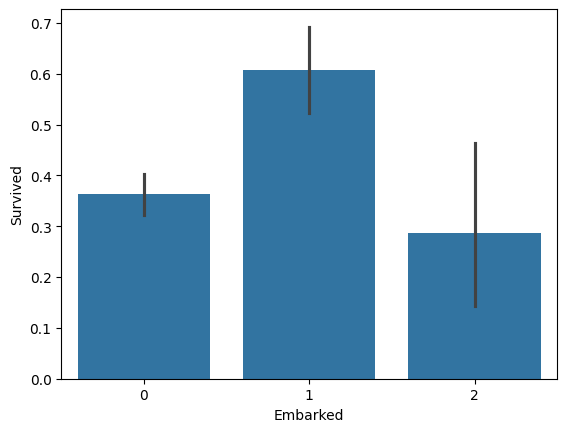

In [ ]:
sb.barplot(x="Embarked", y="Survived", data=cat_train)

<Axes: xlabel='Embarked', ylabel='Pclass'>

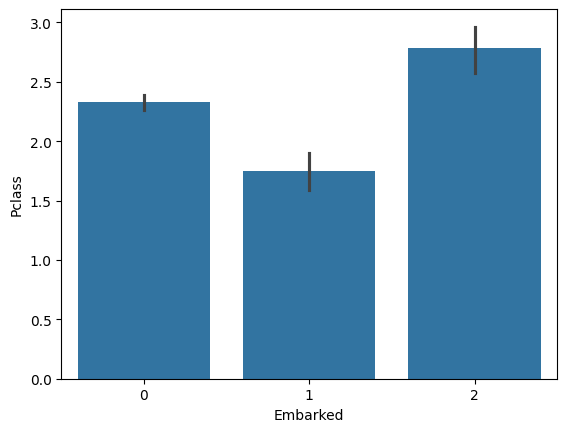

In [ ]:
sb.barplot(x="Embarked", y="Pclass", data=cat_train)

<Axes: xlabel='Deck', ylabel='Survived'>

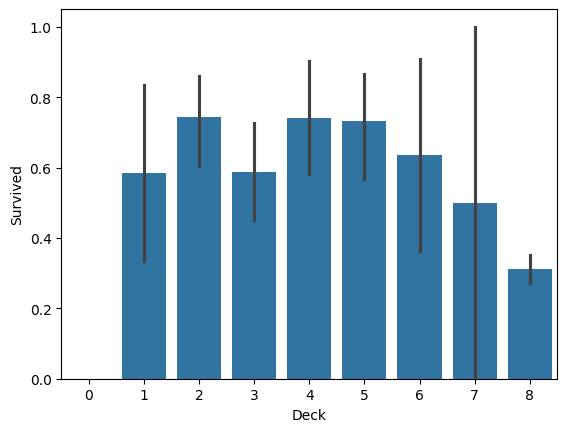

In [ ]:
sb.barplot(x="Deck", y="Survived", data=cat_train)

## BINARY CLASSIFICATION SUMMARISED AND CORRELATION

Lets also plot the survival correlation for each of the numerical features. Here we see:

1.   The highest survival rate for male were among children.
2.   Survival rate is positively correlated with social class and fare price

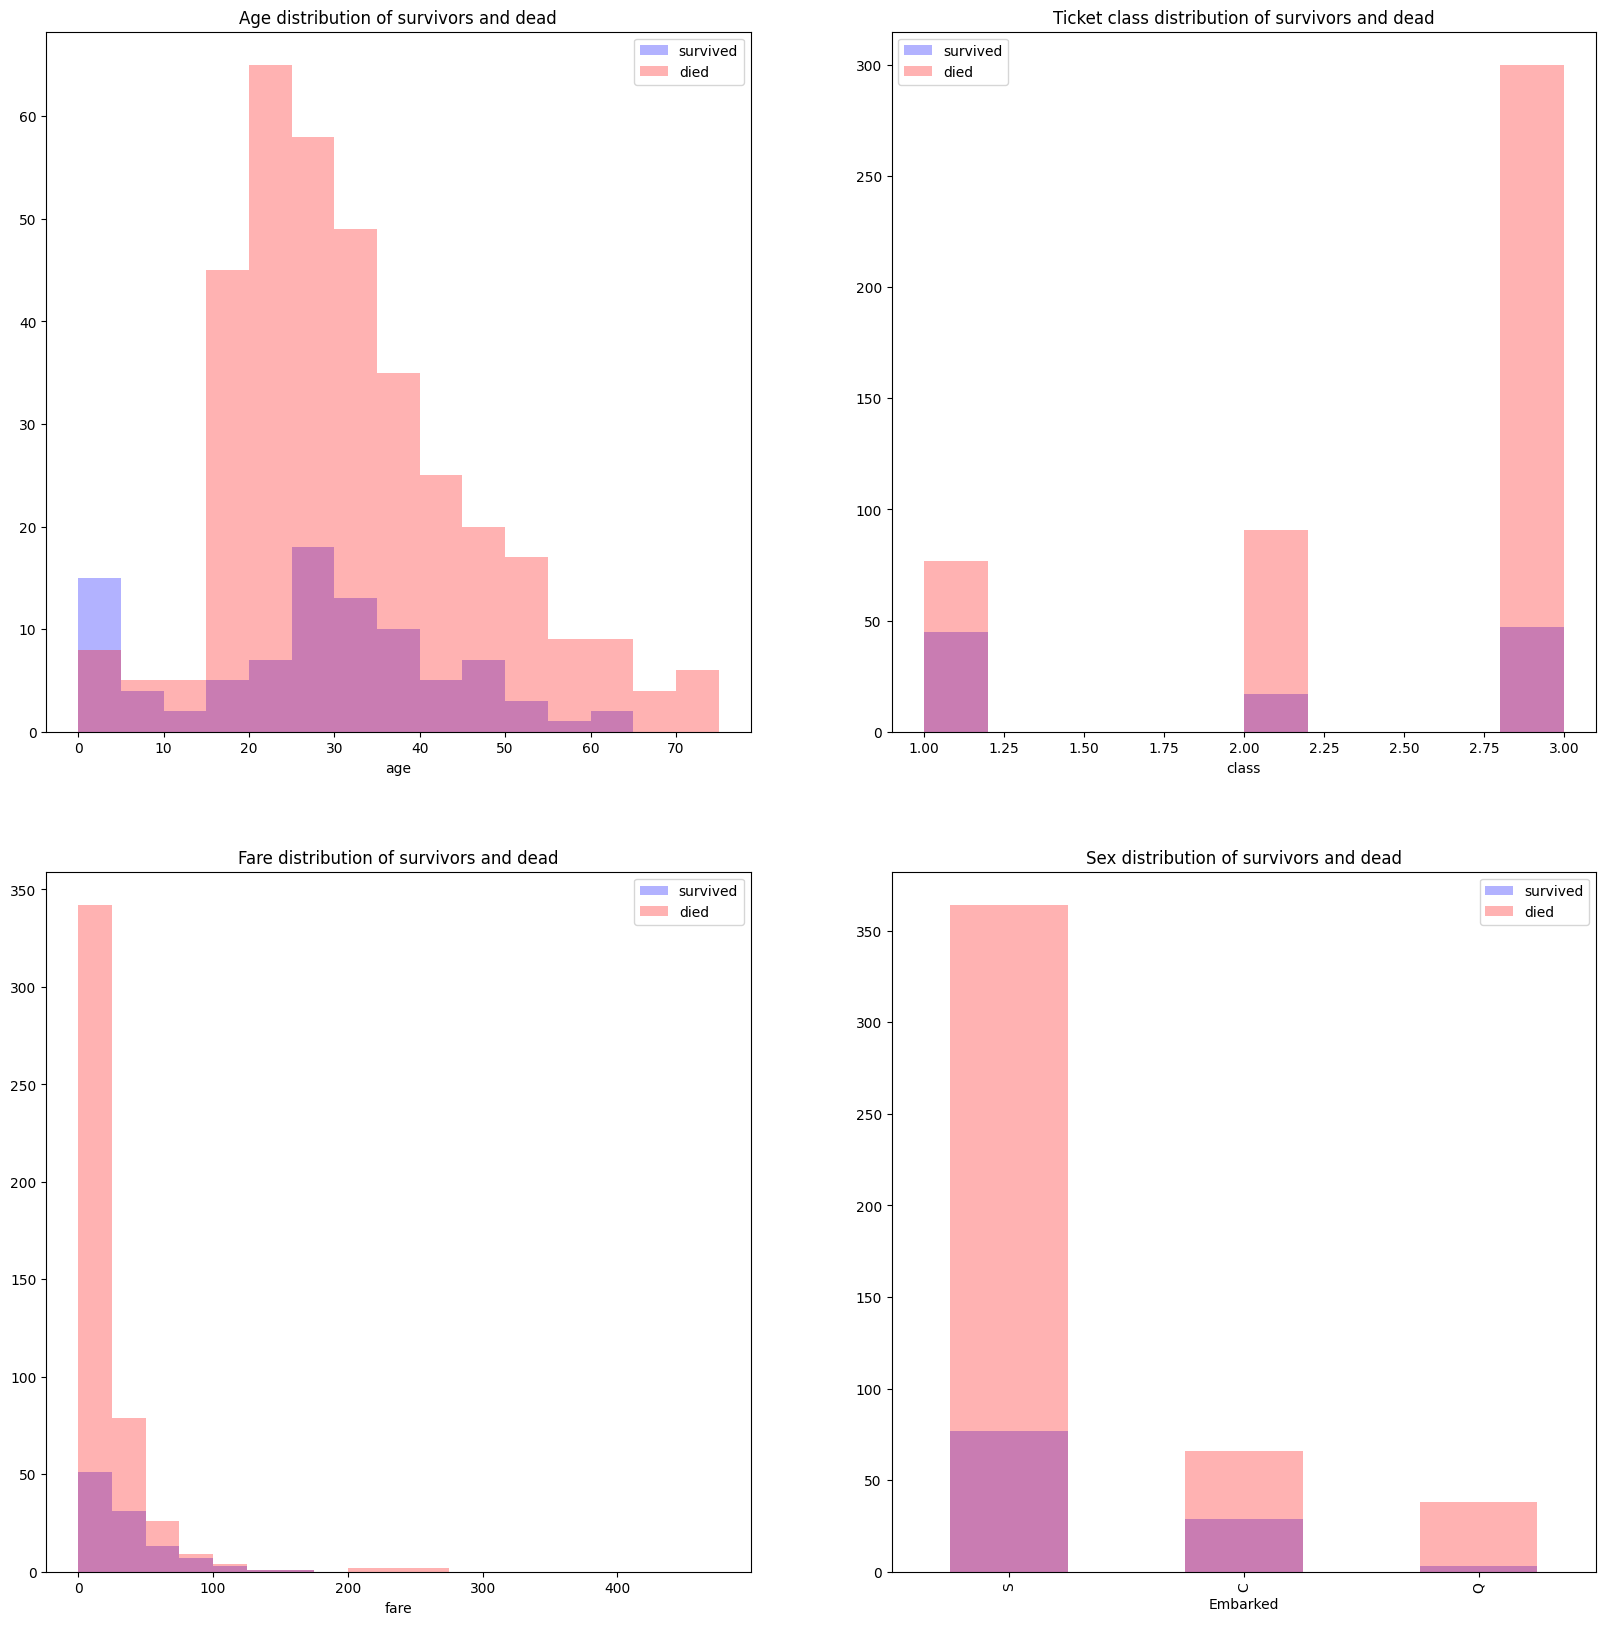

In [ ]:
_df = train[(train['Sex'] == 'male')]

# Plotting feature distributions of males
plt.figure(figsize=(10*2,10*2))

plt.subplot(221)
plt.title("Age distribution of survivors and dead")
bins = range(0,80,5)
plt.hist(_df.loc[_df['Survived'] == 1]['Age'], color='blue', alpha=.3, label='survived', bins=bins)
plt.hist(_df.loc[_df['Survived'] == 0]['Age'], color='red', alpha=.3, label='died', bins=bins)
plt.xlabel('age')
plt.legend()

plt.subplot(222)
plt.title("Ticket class distribution of survivors and dead")
plt.hist(_df.loc[_df['Survived'] == 1]['Pclass'], color='blue', alpha=.3, label='survived')
plt.hist(_df.loc[_df['Survived'] == 0]['Pclass'], color='red', alpha=.3, label='died')
plt.legend()
plt.xlabel('class')

plt.subplot(223)
plt.title("Fare distribution of survivors and dead")
bins = range(0,500,25)
plt.hist(_df.loc[_df['Survived'] == 1]['Fare'], color='blue', alpha=.3, label='survived', bins=bins)
plt.hist(_df.loc[_df['Survived'] == 0]['Fare'], color='red', alpha=.3, label='died', bins=bins)
plt.legend()
plt.xlabel('fare')

plt.subplot(224)
plt.title("Sex distribution of survivors and dead")
_df.loc[_df['Survived'] == 1]['Embarked'].value_counts().plot(kind='bar', color='blue', alpha=.3, label='survived')
_df.loc[_df['Survived'] == 0]['Embarked'].value_counts().plot(kind='bar', color='red', alpha=.3, label='died')
plt.legend()
plt.show()

Finally lets plot the feature correlation matrix. This will be useful when interpreting model results. We see significant correlations between social class and fare price as well as number of siblings and number of parents on the boat.

To have a look at the influence of gender and age on passenger survival the data set is split into male and female passengers and the analysis for age groups from above is repeated.

In [ ]:
train['AgeGroup'] = 0

# labels for the different age groups
age_groups = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'] # age groups

# split the passengers into age groups of 10 years
train['AgeGroup'] = pd.cut(train['Age'], range(0, 90, 10), labels=age_groups)

def age_group_summary(df, age_groups):
    """Create a result summary for the different age groups."""
    # calculate the survival rates and counts for the different age groups
    age_survival = df[['AgeGroup', 'Survived']].groupby('AgeGroup').agg(['mean', 'count', 'sum'])

    # reindex to get the correct order in the calculated data frame
    age_survival = age_survival.reindex(age_groups)

    # change the column headers
    age_survival.columns = age_survival.columns.droplevel() # remove multilevel index
    age_survival.columns = ['Survival rate', 'Total', 'Survived']

    # create a new column containing the number of passengers that died
    age_survival['Died'] = age_survival['Total'] - age_survival['Survived']

    return age_survival

# calculate the survival rates for the different age groups
age_survival = age_group_summary(train, age_groups)
age_survival

,Survival rate,Total,Survived,Died
AgeGroup,,,,
1-10,0.593750,64,38,26
11-20,0.382609,115,44,71
21-30,0.365217,230,84,146
31-40,0.441558,154,68,86
41-50,0.383721,86,33,53
51-60,0.404762,42,17,25
61-70,0.187500,16,3,13
71-80,0.200000,5,1,4


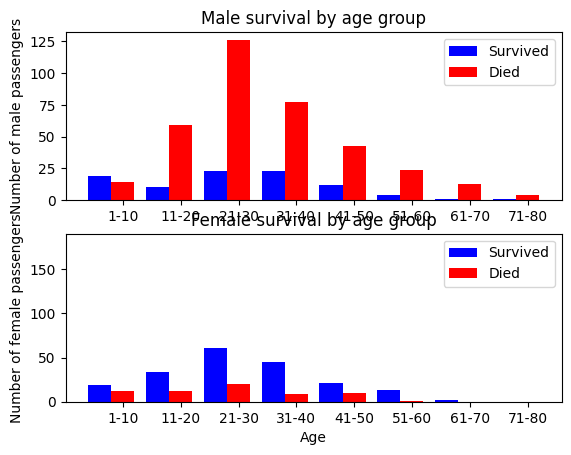

In [ ]:
men_df = train.loc[train['Sex'] == 0]
women_df = train.loc[train['Sex'] == 1]

# calculate the survival rates for the different age groups for both genders
male_age_survival = age_group_summary(men_df, age_groups)
female_age_survival = age_group_summary(women_df, age_groups)

# vectors for the bar positions
ind = np.arange(len(male_age_survival))

# bar width
width = 0.4

# create 2 subplots in the figure
fig, (ax1, ax2) = plt.subplots(2, 1)

# male bar plot
survived = male_age_survival['Survived'].values
bar11 = ax1.bar(ind, survived, width=width, color='blue', label='Survived')

died = male_age_survival['Died'].values
bar12 = ax1.bar(ind + width, died, width=width, color='red',
              label='Died')

# format male bar plot
ax1.set(xticks=(ind + width), xticklabels=age_groups, ylabel='Number of male passengers',
       title='Male survival by age group')
ax1.legend()

# female bar plot
survived = female_age_survival['Survived'].values
bar21 = ax2.bar(ind, survived, width=width, color='blue', label='Survived')

died = female_age_survival['Died'].values
bar22 = ax2.bar(ind + width, died, width=width, color='red',
              label='Died')

# format female bar plot
ax2.set(xlabel='Age', xticks=(ind + width), xticklabels=age_groups, ylabel='Number of female passengers', ylim=[0, 180],
       title='Female survival by age group')
ax2.legend()

plt.show()

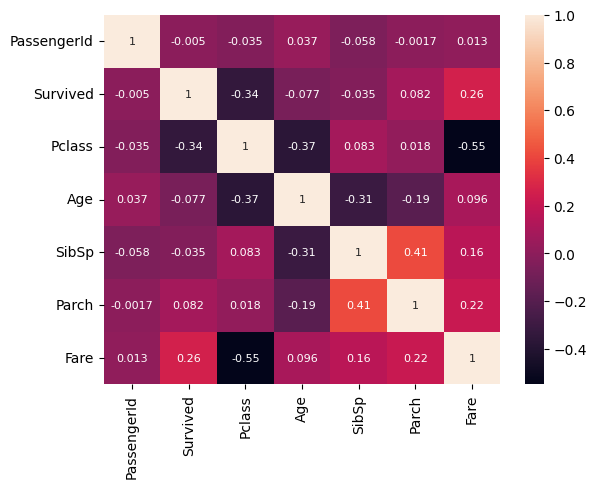

In [ ]:
sb.heatmap(train.corr(numeric_only=True), annot=True, annot_kws={"fontsize": 8})
plt.show()

Combining them into one crrelation heatmap comparing them with survivability we obtain the following


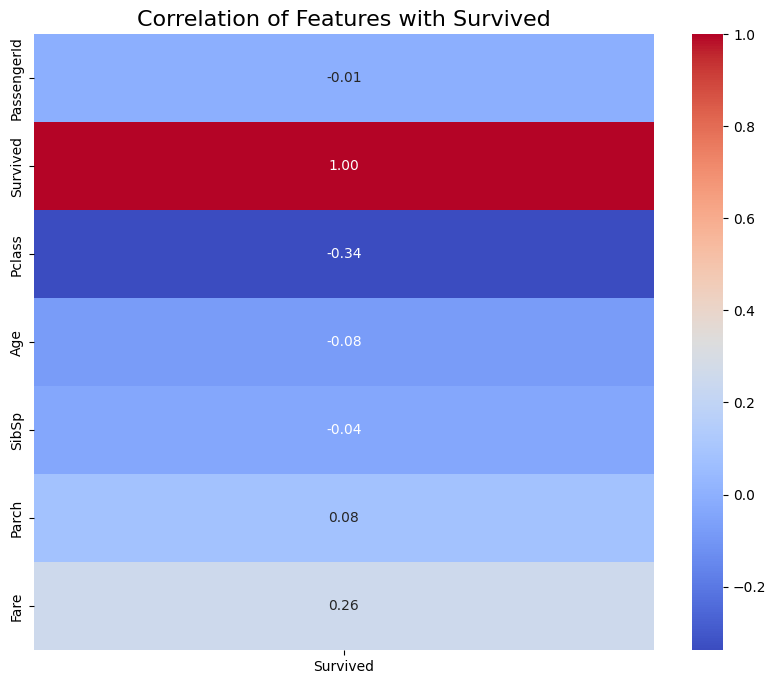

In [ ]:
train_df = train.select_dtypes(include=['number'])
corr_matrix = train_df.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix[['Survived']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Features with Survived', fontsize=16)
plt.show()

PClass and Sex of the passenger have the highest correlation with survivability
